In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

In [2]:
features = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
]

categories = { 
    "workclass": "category",
    "education": "category",
    "marital-status": "category",
    "occupation": "category",
    "relationship": "category",
    "race": "category",
    "sex": "category",
    "native-country": "category",
    "income": "category"
}

In [3]:
# load data
training_data = pd.read_csv("data/adult.data", sep = ",", names = features, dtype = categories)
testing_data = pd.read_csv("data/adult.test", sep = ",", skiprows = 1, names = features, dtype = categories)
training_data = pd.DataFrame(training_data, columns = features)
testing_data = pd.DataFrame(testing_data, columns = features)

In [4]:
# dealing with missing values
training_data.replace(to_replace = " ?", value = np.nan, inplace = True)
testing_data.replace(to_replace = " ?", value = np.nan, inplace = True)

# dropping non-useful columns
training_data.drop(["fnlwgt"], axis = 1, inplace = True)
testing_data.drop(["fnlwgt"], axis = 1, inplace = True)

In [5]:
training_data.isnull().sum()

age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [6]:
training_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [7]:
training_data.skew()

C:\Users\joshu\AppData\Local\Temp\ipykernel_5024\189652602.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_data.skew()


age                0.558743
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [8]:
training_data.kurtosis()

C:\Users\joshu\AppData\Local\Temp\ipykernel_5024\3246180339.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  training_data.kurtosis()


age                -0.166127
education-num       0.623444
capital-gain      154.799438
capital-loss       20.376802
hours-per-week      2.916687
dtype: float64

In [9]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       30725 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      30718 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  31978 non-null  category
 13  income          32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [10]:
train_cat = training_data.select_dtypes(include = 'category')
test_cat = testing_data.select_dtypes(include = 'category')

# separate target variable
train_income = train_cat["income"]

train_num = training_data.select_dtypes(include = 'number')
test_num = testing_data.select_dtypes(include = 'number')

# for comparing across classes
train_num = pd.concat([train_num, train_income], axis = 1)

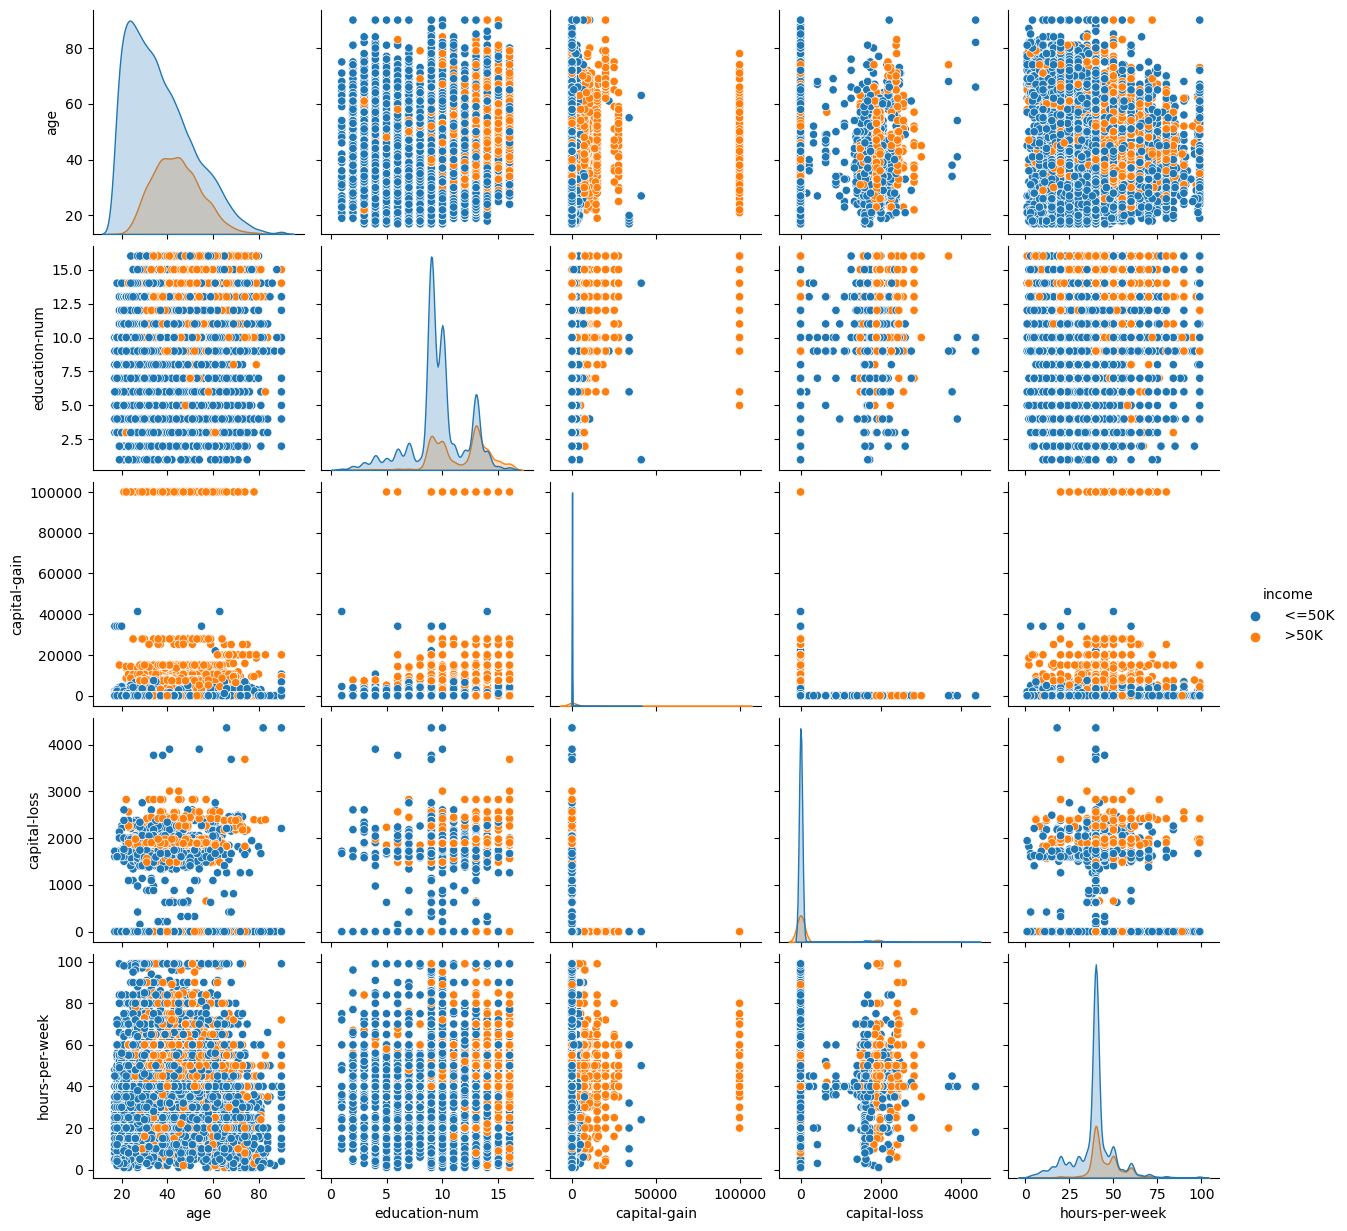

In [11]:
plot = sns.pairplot(train_num, hue = 'income')

In [12]:
print(train_num[(train_num['capital-loss']>0)].count())
print(train_num[(train_num['capital-gain']>0)].count())

age               1519
education-num     1519
capital-gain      1519
capital-loss      1519
hours-per-week    1519
income            1519
dtype: int64
age               2712
education-num     2712
capital-gain      2712
capital-loss      2712
hours-per-week    2712
income            2712
dtype: int64


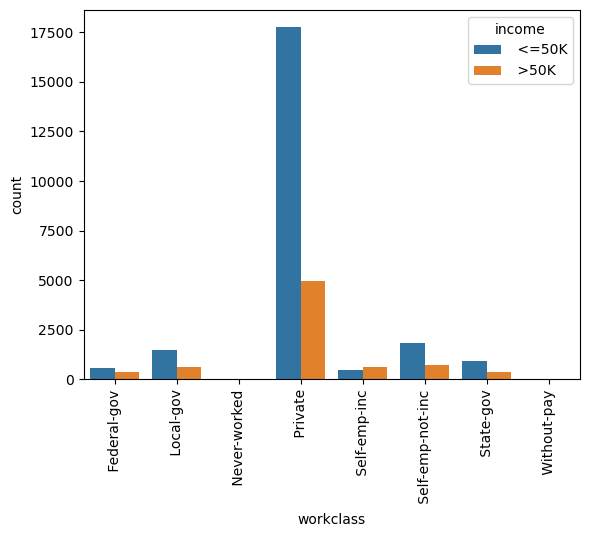

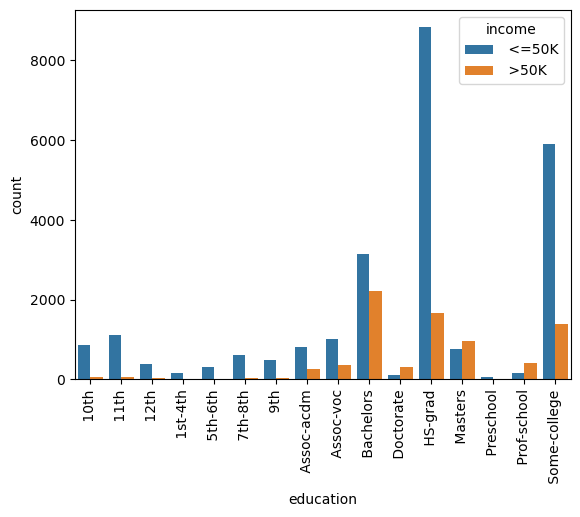

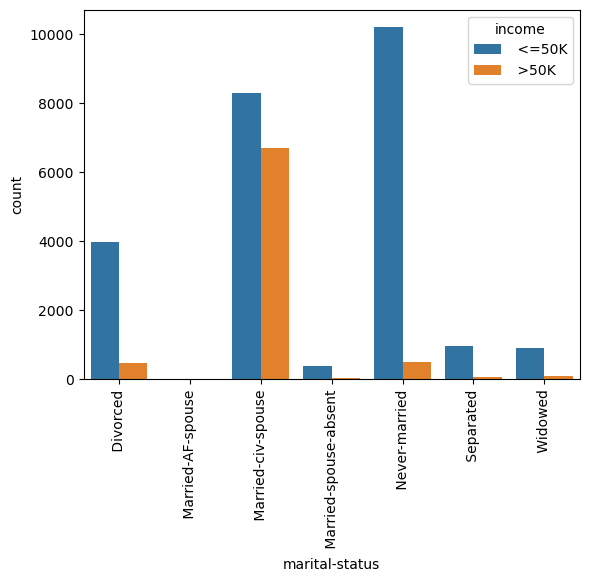

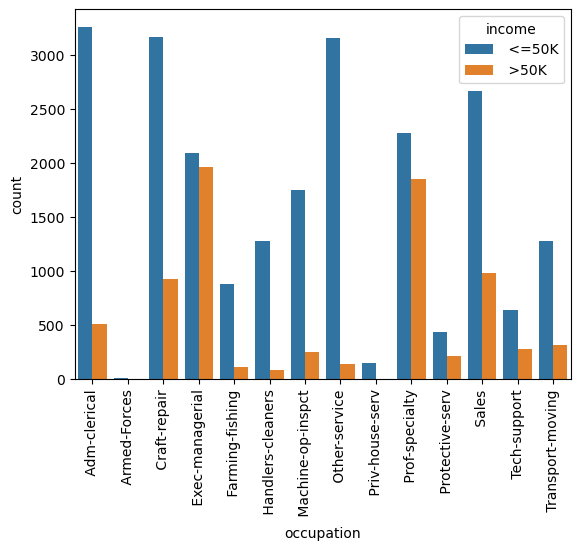

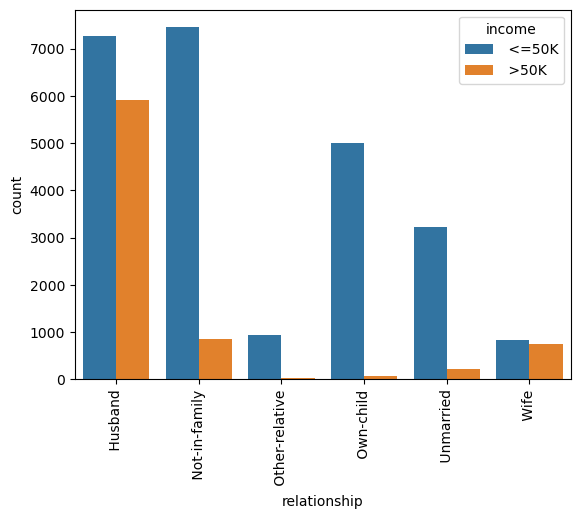

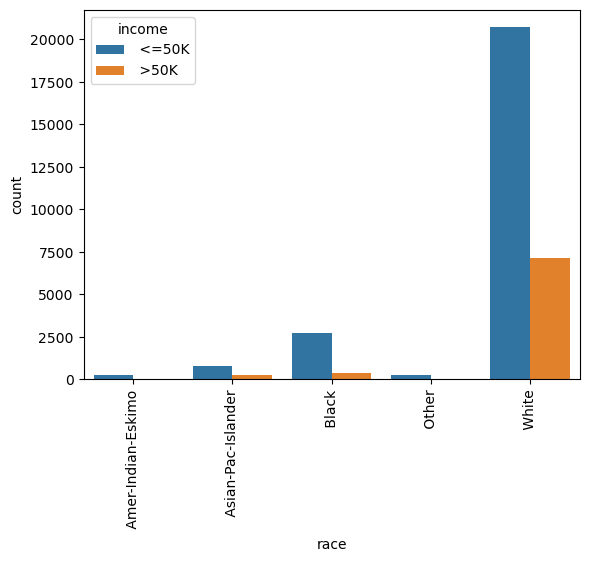

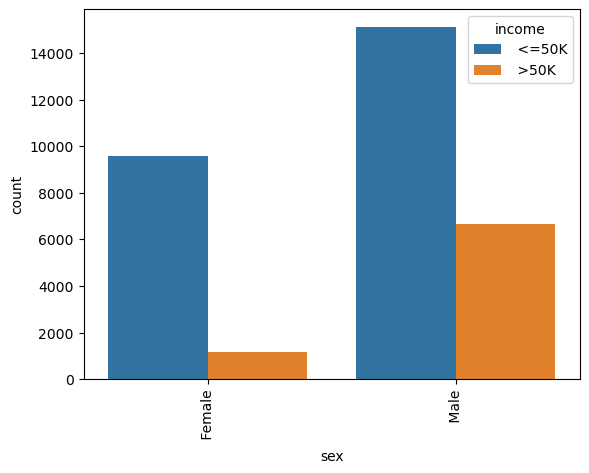

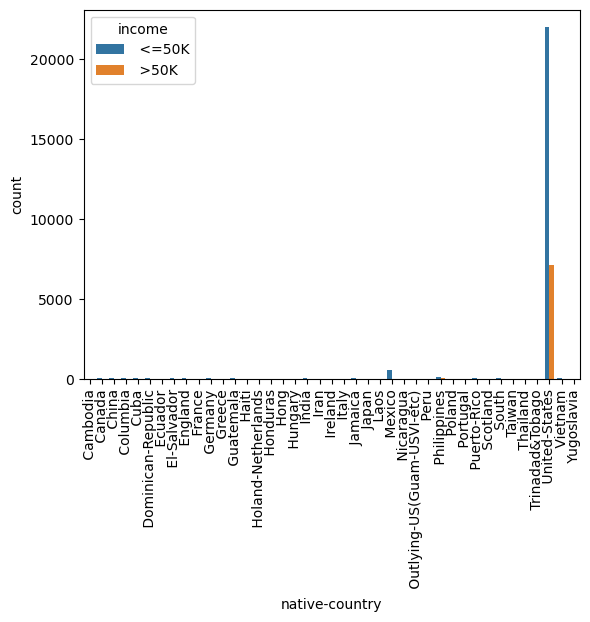

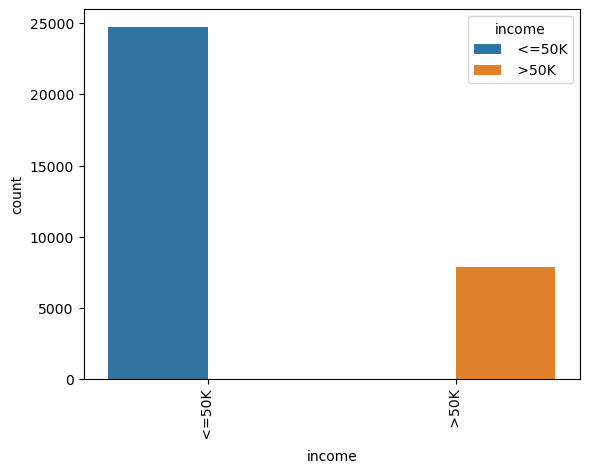

In [13]:
for category in train_cat.columns:
    plot = sns.countplot(train_cat, x = category, hue = 'income')
    plt.xticks(rotation = 90)
    plt.show()

# drop target after comparison
train_cat.drop(columns = "income", inplace = True)
test_cat.drop(columns = "income", inplace = True)
train_num.drop(columns = "income", inplace = True)

In [14]:
num_feats = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

In [15]:
# drop duplicate feature
train_cat.drop(columns = ["education"], inplace = True)
test_cat.drop(columns = ["education"], inplace = True)

# replace missing values with the most common
fill_mode = {"workclass": " Private", "occupation": " Prof-specialty", "native-country": " United-States"}
train_cat.fillna(value = fill_mode, inplace = True)
test_cat.fillna(value = fill_mode, inplace = True)

# ohe categorical features
train_cat = pd.get_dummies(train_cat)
test_cat = pd.get_dummies(test_cat)

# scale numerical features
scaler1 = StandardScaler()
scaler2 = StandardScaler()
train_num = pd.DataFrame(scaler1.fit_transform(train_num), columns = num_feats)
test_num = pd.DataFrame(scaler2.fit_transform(test_num), columns = num_feats)

X_train = pd.concat([train_num, train_cat], axis = 1, join = 'inner')
X_test = pd.concat([test_num, test_cat], axis = 1, join = 'inner')

df_X = pd.concat([X_train, X_test], ignore_index = True)
df_X.fillna(value = 0, inplace = True)

y_test = testing_data.iloc[:, -1]
y_train = training_data.iloc[:, -1]

# dealing with inconsistent class labels between training and test
y_test = y_test.replace(" <=50K.", value = " <=50K")
y_test = y_test.replace(" >50K.", value = " >50K")

df_y = pd.concat([y_train, y_test], ignore_index = True)
df_full = pd.concat([df_X, df_y], axis = 1, join = "inner")